# Data Exploration for the Parkinsons Dataset

In [2]:
import os

import numpy as np

import pandas as pd

from torchvision.datasets.utils import download_url

from sklearn.preprocessing import StandardScaler

## Download the UCI Parkinsons dataset

In [3]:
urls = [
    "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data",
    "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.names"
]

raw_folder = "/home/flo/ssdgm/notebooks/datasets/UCI/Parkinsons/raw"

os.makedirs(raw_folder, exist_ok=True)

In [4]:
filenames = [os.path.basename(url) for url in urls]
filenames

['parkinsons_updrs.data', 'parkinsons_updrs.names']

In [5]:
for filename, url in zip(filenames, urls):
    download_url(url=url, root=raw_folder, filename=filename)

Using downloaded and verified file: /home/flo/ssdgm/notebooks/datasets/UCI/Parkinsons/raw/parkinsons_updrs.data
Using downloaded and verified file: /home/flo/ssdgm/notebooks/datasets/UCI/Parkinsons/raw/parkinsons_updrs.names


## Load the UCI Parkinsons dataset

In [6]:
uci_df = pd.read_csv(os.path.join(raw_folder, filenames[0]))

## Load the SSDKL Parkinsons dataset

In [7]:
ssdkl_folder = "/home/flo/ssdgm/notebooks/datasets/SSDKL/parkinsons"

X = np.load(os.path.join(ssdkl_folder, "X.npy"))
y = np.load(os.path.join(ssdkl_folder, "y.npy"))

## Exploration

In [8]:
uci_df.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [10]:
uci_df.columns

Index(['subject#', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')

In [10]:
X.shape, y.shape

((5875, 20), (5875,))

In [11]:
total = uci_df["total_UPDRS"]
motor = uci_df["motor_UPDRS"]
subject_id = uci_df["subject#"]

total.std(), motor.std()

(10.700283252298227, 8.12928152405538)

In [12]:
df = uci_df.drop([total.name, subject_id.name], axis=1)

## Conclusions

- column **`total_UPDRS`** is the target variable in the SSDKL paper
   - the features are standardized ($\mu=0, \sigma=1$)
   - the target is left untouched
- column **`subject#`** is excluded --> I will do that!
- column **`motor_UPDRS`** is included as a feature --> I won't do that!


<AxesSubplot:>

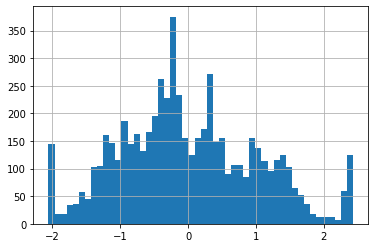

In [24]:
((uci_df["total_UPDRS"] - uci_df["total_UPDRS"].mean()) / uci_df["total_UPDRS"].std()).hist(bins=50)

In [26]:
(uci_df["total_UPDRS"] - uci_df["total_UPDRS"].mean())

0       5.379058
1       5.875058
2       6.370058
3       6.791058
4       7.356058
          ...   
5870    4.466058
5871    3.969058
5872    3.476058
5873    2.988058
5874    2.494058
Name: total_UPDRS, Length: 5875, dtype: float64

In [27]:
((uci_df["total_UPDRS"] - uci_df["total_UPDRS"].mean()) / uci_df["total_UPDRS"].std())

0       0.502702
1       0.549056
2       0.595317
3       0.634661
4       0.687464
          ...   
5870    0.417378
5871    0.370930
5872    0.324857
5873    0.279250
5874    0.233083
Name: total_UPDRS, Length: 5875, dtype: float64

<AxesSubplot:>

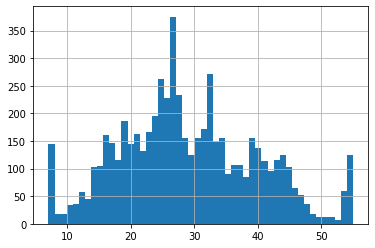

In [25]:
uci_df["total_UPDRS"].hist(bins=50)

<AxesSubplot:>

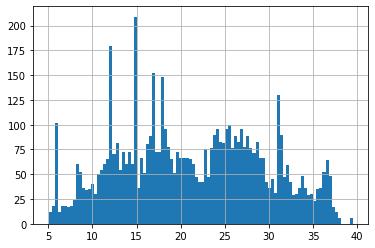

In [15]:
uci_df["motor_UPDRS"].hist(bins=100)